# CMSC471 - Assignment 4: Classification and Regression with Scikit-Learn

## Overview and Learning Objectives

You've learnt very important fundamental concepts in ML and model evaluation so far. This assignment attempts to take your understanding to the next level by some insightful exercises. What you pratice in this assignment are critical ML skills and can also help you get started on your project, so please read and follow the instructions <b>patiently and carefully!</b>

In Part I of this assignment, you are going to build and compare three classifiers applied on South African Heart Disease dataset from the book: ["Elements of Statistical Learning"](https://web.stanford.edu/~hastie/ElemStatLearn/) by T. Hastie, R. Tibshirani, and J. Friedman.

"AI/Machine Learning in Healthcare" is currently one of the trend application domains of ML. According to [ReportLinker](https://www.reportlinker.com/p05251483/Global-AI-in-Healthcare-Market-Report-for.html), "spending on this category is forecasted to jump from \\$2.1 billion to \\$36.1 billion by 2025. This is a 50.2% Compound Annual Growth Rate (CAGR)."

In Part II, you will answer some questions on a regression example from scikit-learn documentation.

<b>Notice: </b>As you work through this assignment, it is recommended to consult with the textbook and sklearn documentations.

Pedagogically, this assignment will help you:
- better understand classification and regression.

- getting started with scikit-learn and its built-in methods, classification and regression models.

- practice data preprocessing.

- practice model evaluation using performance metrics and cross validation.

- learn how to plot ROC curves.

## Part I - Classification

You are going to build three classifiers from sklearn to predict heart disease. First, import necessary Python and sklearn modules. <br><b>Notice</b> the imported modules and libraries as you might need to work with them in your project too.

In [0]:
# Import necessary modules
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score
import sklearn.metrics as metrics

import matplotlib.pyplot as plt
%matplotlib inline

Next, load the data with pandas. The data (csv file) should be stored in the same working directory as your notebook.

In [0]:
heart_data = pd.read_csv('SAheart.csv', sep=',', header=0, index_col=False)

In [94]:
heart_data.head()

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


Some description about the features from the data source:

> "A retrospective sample of males in a heart-disease high-risk region of the Western Cape, South Africa. There are roughly two controls per case of CHD. Many of the CHD positive men have undergone blood pressure reduction treatment and other programs to reduce their risk factors after their CHD event. In some cases the measurements were made after these treatments. These data are taken from a larger dataset, described in  Rousseauw et al, 1983, South African Medical Journal." 

        sbp	        systolic blood pressure
        tobacco		cumulative tobacco (kg)
        ldl		    low densiity lipoprotein cholesterol
        adiposity
        famhist		family history of heart disease (Present, Absent)
        typea		  type-A behavior
        obesity
        alcohol		current alcohol consumption
        age		    age at onset
        chd		    label, coronary heart disease


## <font color="red"> Required Coding

In [95]:
### START CODING HERE ###
# The first column, row.names is useless, drop it! ~ 1 line
heart_data.drop(['row.names'], inplace=True, axis=1)
### END CODING HERE ###

heart_data.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [96]:
# Get the feature data types.
heart_data.dtypes

sbp            int64
tobacco      float64
ldl          float64
adiposity    float64
famhist       object
typea          int64
obesity      float64
alcohol      float64
age            int64
chd            int64
dtype: object

You need to convert `famhist` from categorical (Present/Absent) to numerical {0,1} for further processing in classifiers.

## <font color="red"> Required Coding

In [97]:
### START CODING HERE ### 
# Convert 'famhist' to pd.Categorical and then use .cat.codes to convert the values to [0,1] ~2 lines
# Hint: There might be other ways to do this using pandas dataframe methods.
# Make sure your output looks exactly like the dataframe head below, i.e. famhist values are converted to {0,1}.
heart_data['famhist'] = heart_data['famhist'].astype('category').cat.codes
### END CODING HERE ###

heart_data.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1


In [98]:
type(heart_data['famhist'][0])

numpy.int8

## <font color="red"> Required Coding

In [99]:
# Create X, y - Notice that X should contain all the features (columns) except 'chd'
# y should include 'chd' only as it's the label!
### START CODING HERE ### ~2 lines
X = heart_data.drop(['chd'], axis=1)
y = heart_data['chd']
### END CODING HERE ###

print(X.shape)
print(y.shape)

(462, 9)
(462,)


## <font color="red"> Required Coding

In [100]:
### START CODING HERE ###
# Split the data to train and test using train_test_split method with test_size=0.33 and random_state=42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
### END CODING HERE ###

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(309, 9)
(309,)
(153, 9)
(153,)


## <font color="red"> Required Coding

In [101]:
### START CODING HERE ###
# Create a SGDClassifier with a random_state of 42 and 'hinge' loss
sgd_clf = SGDClassifier(random_state=42, loss='hinge')
# Perform a 10-fold cross validation with scoring 'roc_auc'
# Hint: cross validation should be done on the whole dataset
sgd_cv_score = cross_val_score(sgd_clf, X, y, cv=10, scoring='roc_auc')
### END CODING HERE ###

print("Mean AUC Score - Stochastic Gradient Descent: ", sgd_cv_score.mean())

Mean AUC Score - Stochastic Gradient Descent:  0.7224193548387097


In [102]:
### START CODING HERE ###
# Create a LogisticRegression with a random_state of 42 and 'liblinear' solver
logr_clf = LogisticRegression(random_state=42, solver='liblinear')
# Perform a 10-fold cross validation with scoring 'roc_auc'
# Hint: cross validation should be done on the whole dataset
logr_cv_score = cross_val_score(logr_clf, X, y, cv=10, scoring='roc_auc')
### END CODING HERE ###

print("Mean AUC Score - Logistic Regression: ", logr_cv_score.mean())

Mean AUC Score - Logistic Regression:  0.761518817204301


In [103]:
### START CODING HERE ###
# Create a RandomForestClassifier with n_estimators=100, max_leaf_nodes=16, n_jobs=-1
rf_clf = RandomForestClassifier(n_estimators=100, max_leaf_nodes=16, n_jobs=-1)
# Perform a 10-fold cross validation with scoring 'roc_auc'
# Hint: cross validation should be done on the whole dataset
rf_cv_score = cross_val_score(rf_clf, X, y, cv=10, scoring='roc_auc')
### END CODING HERE ###

print("Mean AUC Score - Random Forest: ", rf_cv_score.mean())

Mean AUC Score - Random Forest:  0.7506653225806452


In [104]:
# Fit the rf_clf on the training set
rf_clf.fit(X_train,y_train)

# Get feature_importances of rf for all features
for name, score in zip(heart_data, rf_clf.feature_importances_):
    print(name, score)

sbp 0.15771304504389272
tobacco 0.12257010123983544
ldl 0.1422851801896806
adiposity 0.13066213636884594
famhist 0.035322876607859766
typea 0.08785321750522669
obesity 0.0949957649842602
alcohol 0.06408894904629593
age 0.16450872901410268


> Now, the following cells show how you can plot ROC curve using fpr, tpr, and threshold returned by metrics.roc_curve and class probabilities using `predict_proba` method. Notice that some classifiers don't have `predict_proba` method, and in that case you can use `decision_function` method to get the scores (preds).

In [0]:
# Get class probabilities, fpr, tpr and threshold for random forest.
rf_probs = rf_clf.predict_proba(X_test)
rf_preds = rf_probs[:,1]
rf_fpr, rf_tpr, rf_threshold = metrics.roc_curve(y_test, rf_preds)
rf_roc_auc = metrics.auc(rf_fpr, rf_tpr)

Text(0.5, 0, 'False Positive Rate')

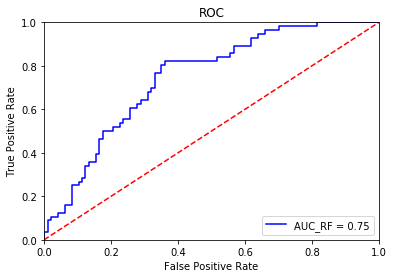

In [106]:
# Plot ROC curve.
plt.title('ROC')
plt.plot(rf_fpr, rf_tpr, 'b', label = 'AUC_RF = %0.2f' % rf_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

## <font color="red"> Required Coding

In [107]:
### START CODING HERE ###
# Fit the sgd_clf and logreg_clf on the training set; ~2 lines
sgd_clf.fit(X_train,y_train)
logr_clf.fit(X_train,y_train)
### END CODING HERE ###

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Text(0.5, 0, 'False Positive Rate')

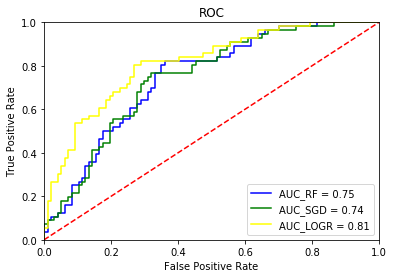

In [108]:
# Plot ROC for all three classifiers with different colors in one plot,
# and with AUC scores shown on the 'lower right' of the plot.

# Write as many number of lines of code as needed.

# Hint1: Look at the code for random forest ROC curve.
# Hint2: sgd with 'hinge' loss doesn't have predict_proba method,
# instead, you should directly use decision_function method to compute sgd_preds

### START CODING HERE ###

sgd_probs = sgd_clf.decision_function(X_test)
sgd_preds = sgd_probs
sgd_fpr, sgd_tpr, sgd_threshold = metrics.roc_curve(y_test, sgd_preds)
sgd_roc_auc = metrics.auc(sgd_fpr,sgd_tpr)
logr_probs = logr_clf.predict_proba(X_test)
logr_preds = logr_probs[:,1]
logr_fpr, logr_tpr, logr_threshold = metrics.roc_curve(y_test, logr_preds)
logr_roc_auc = metrics.auc(logr_fpr, logr_tpr)

plt.title('ROC')
plt.plot(rf_fpr, rf_tpr, 'blue', label = 'AUC_RF = %0.2f' % rf_roc_auc)
plt.plot(sgd_fpr, sgd_tpr, 'green', label = 'AUC_SGD = %0.2f' % sgd_roc_auc)
plt.plot(logr_fpr, logr_tpr, 'yellow', label = 'AUC_LOGR = %0.2f' % logr_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

### END CODING HERE ###

## Part I Questions

Answer the following questions HERE:

Q1 (5 points) - Which classifier has a better performace according to ROC curves above? Which one is the 2nd best?

**Logistic regression (most AUC at 0.81), followed by RandomForest (second most AUC at 0.75).**

Q2 (5 points) - What is the most important feature of this dataset for the random forest classifier? <b>Hint:</b> Check back the previous cells.

**Age (according to the scoring).**

## Part II - Regression

In this part, you review some of the concepts discussed in regression. First, run the cell below. Then answer the following questions.

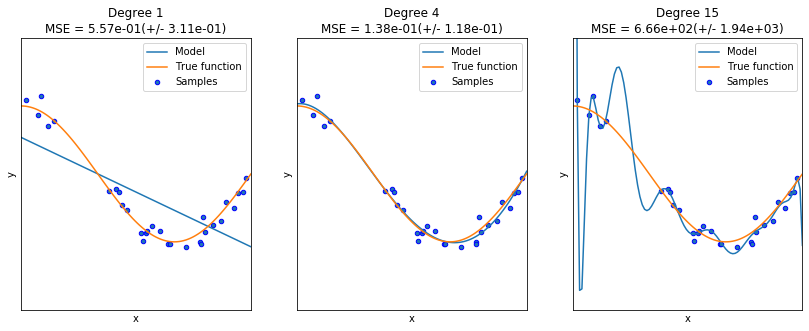

In [116]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using cross validation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_median_absolute_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))

Answer the following questions HERE:

Q1 (5 points) - How do you compare the three plots above in terms of their complexity? 

**Linear (1 variable), low-polynomial (4 variables), high-polynomial (15 variables)**

Q2 (10 points) - GIVE COMPLETE ANSWER! to both part(a) and (b)<br> 
(a) Which plot has overfitting? Why? What caused overfitting (if overfitting occurs in any of the plots)?

**The Degree 15 plot is severely overfitted. In the areas where groupings of samples are sparse, the model is finding arbitrary points of inflection where no samples exist, and that is a sign of too many parameters. Although it does cover more samples than other plots, the model wouldn't be particularly viable if it were to be applied to another sample.**

(b) Which one has underfitting? Why? What caused underfitting (if underfitting occurs in any of the plots)? How would you address overfitting or underfitting in each case (if any)? 

**The Degree 1 plot is severely underfitted. A linear regression does not have a sufficient amount of parameters to cover the sample well enough. In either case of overfitting or underfitting, tweaking the degree of the polynomial (either by increasing or decreasing) would be a step towards finding a better fitting model.**

Q3 (10 points) - GIVE COMPLETE ANSWER! to both part(a) and (b)<br>
(a) What scoring has been used in applying `cross_val_score` on this regression model? Check [sklearn documentation](https://scikit-learn.org/stable/modules/model_evaluation.html) and run the cell above with two other scoring for `cross_val_score`.

**Negative mean squred error was used in the original regression model. I tried neg_median_absolute_error and max_error.**

(b) You can see MSE shown above the plots. Would changing the scoring increase or decrease the error shown above the plots? Why? GIVE COMPLETE ANSWER​ for any of the two scoring you choose.

**For both max_error and neg_median_absolute_error, the scoring with those scorers increased the error. For max_error, it is obvious that denoting the maximum residual error and using that for scoring would increase the MSE. For neg_median_absolute_error, the resulting increase in the MSE is less than that for max_error because the data does not have too much noise, and the resulting median error is not too high due to the relatively un-noisy nature of the sample.**

## Grading

For Assignment 4, your notebook will be run and graded with a maximum of 100 points. Make sure that you get the correct outputs for all cells that you implement and give complete answers to all questions. Also, your notebook should be written with no grammatical and spelling errors and should be nicely-formatted and easy-to-read.

The breakdown of the 100 points is as follows:

Part I implementaion has 65 points:
- 20 points: data preprocessing.
- 30 points: 3 classifiers - each classifier (and cv) implementation has 10 points.
- 15 points: correct plot of 3 ROC for 3 classifiers in one plot with different colors.

Part I questions have 10 points (5 points each).

Part II questions have 25 points, Q1 5 points, Q2 and Q3 each 10 points.

Follow the instructions of each section carefully. Up to 10 points may be deducted if your submitted notebook is not easy to read and follow or if it has grammatical, spelling or formatting issues.

Name your notebook ```Lastname-A4.ipynb```. Submit the file using the ```Assignment-4``` link on Blackboard.

Grading will be based on 

  * correct implementation, correct answer to the questions, and
  * readability of the notebook.
  
<font color=red><b>Due Date: Friday November 22, 11:59PM.</b></font>